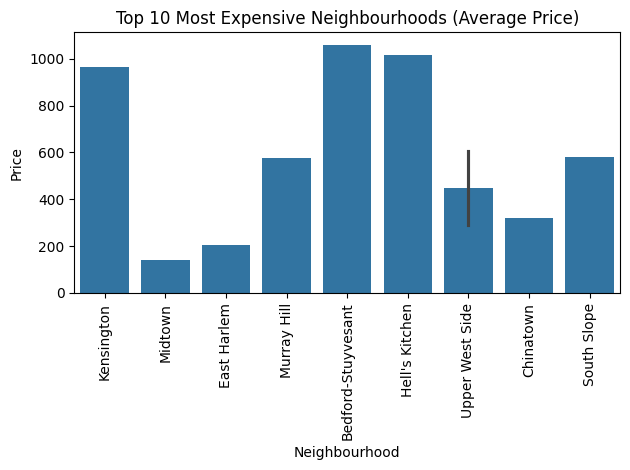

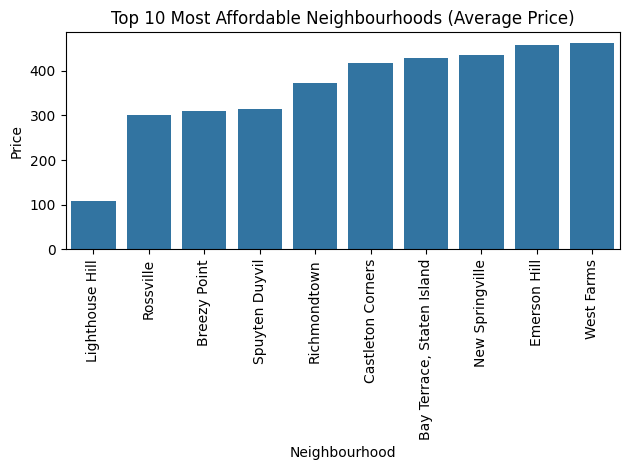

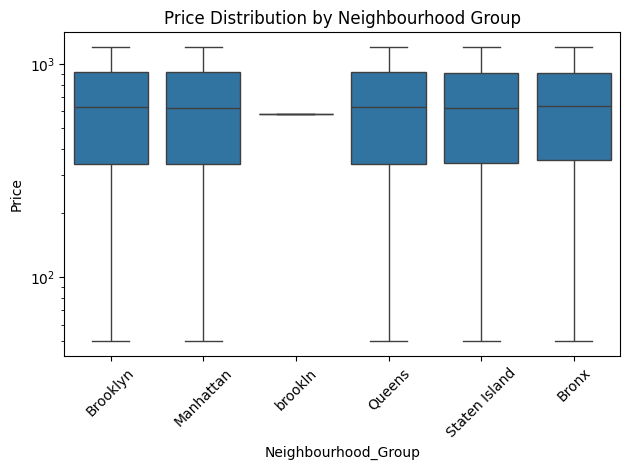

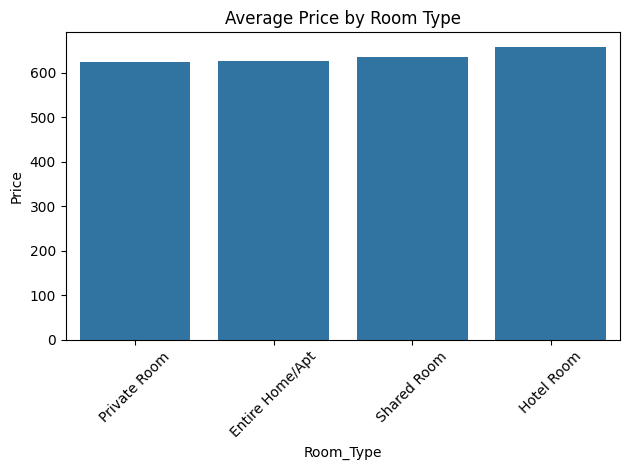

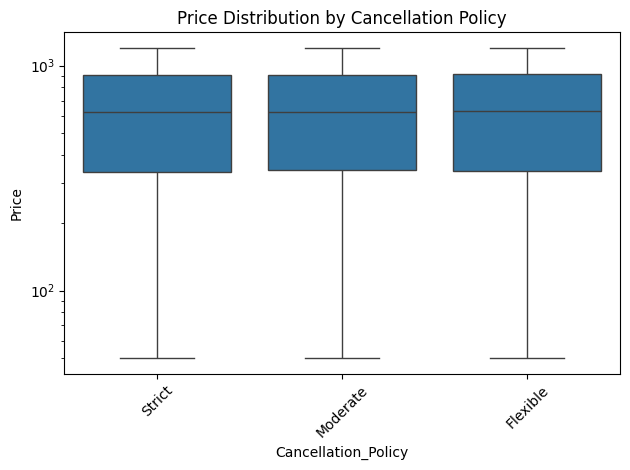

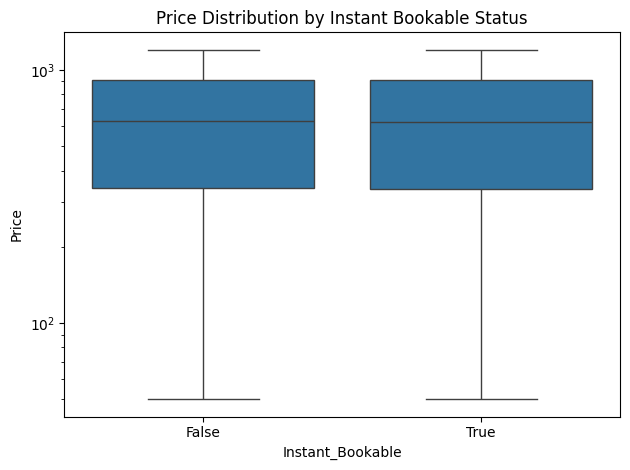

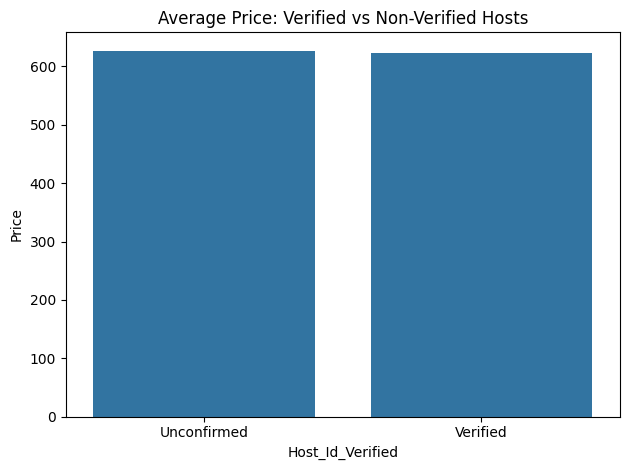

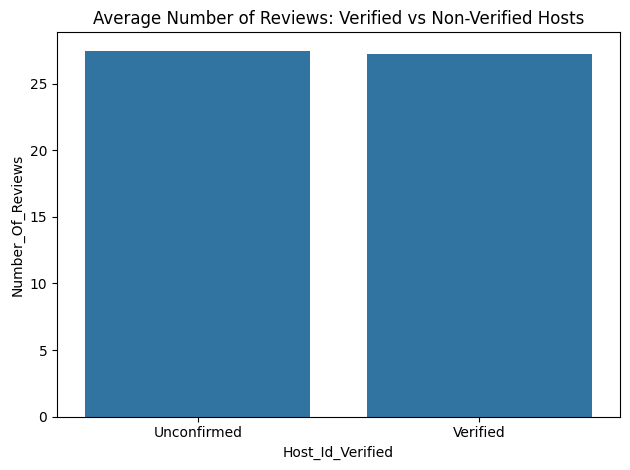

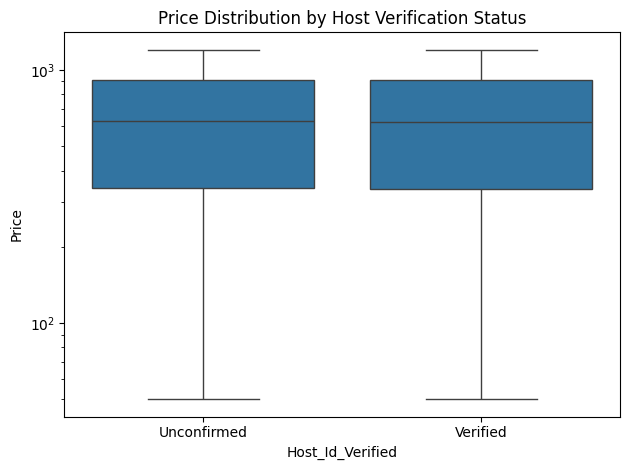

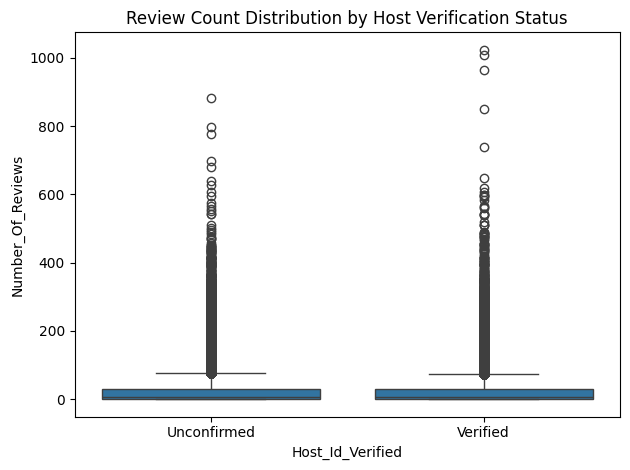

['Name', 'Host_Id', 'Host_Id_Verified', 'Host_Name', 'Neighbourhood_Group', 'Neighbourhood', 'Lat', 'Long', 'Country', 'Country_Code', 'Instant_Bookable', 'Cancellation_Policy', 'Room_Type', 'Construction_Year', 'Price', 'Service_Fee', 'Minimum_Nights', 'Number_Of_Reviews']
Number of properties available ≥300 days/year: 0


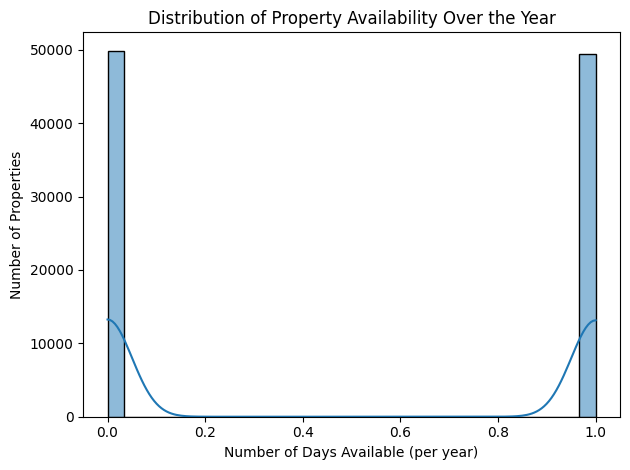

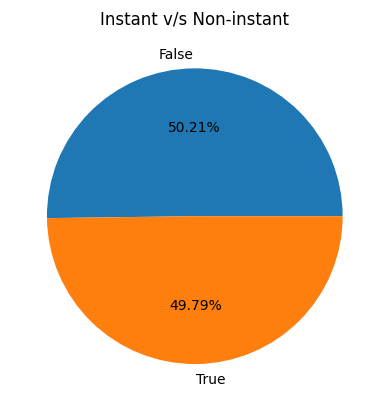

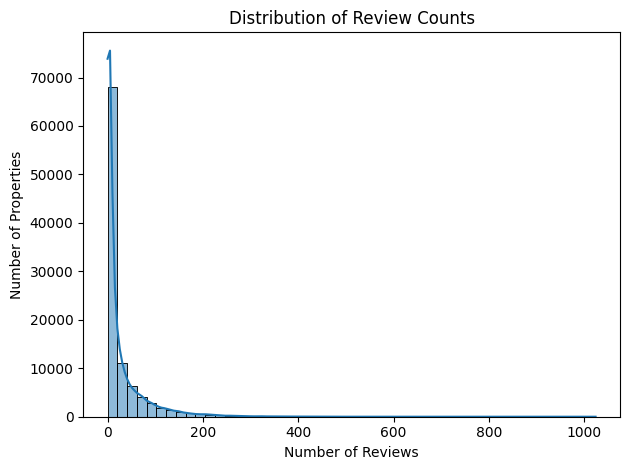

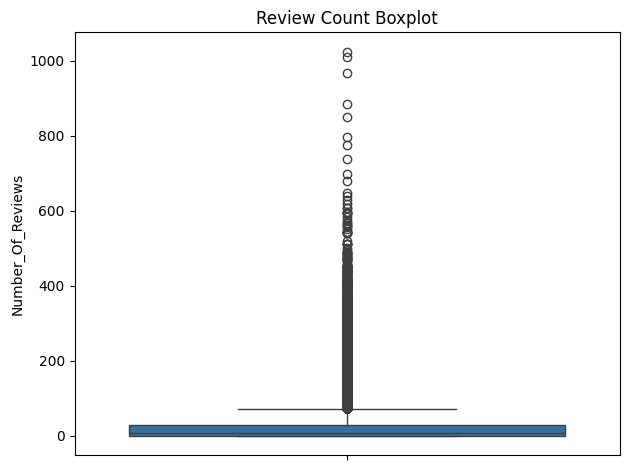

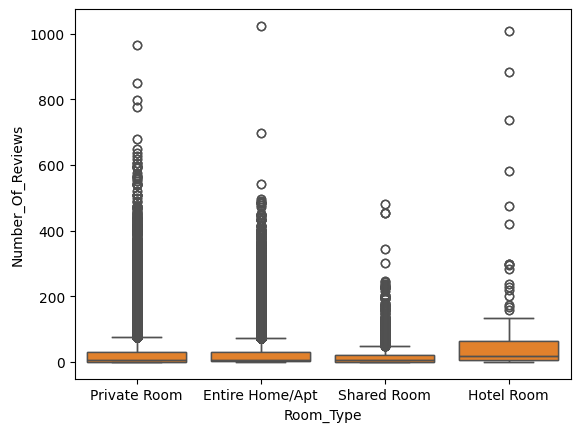

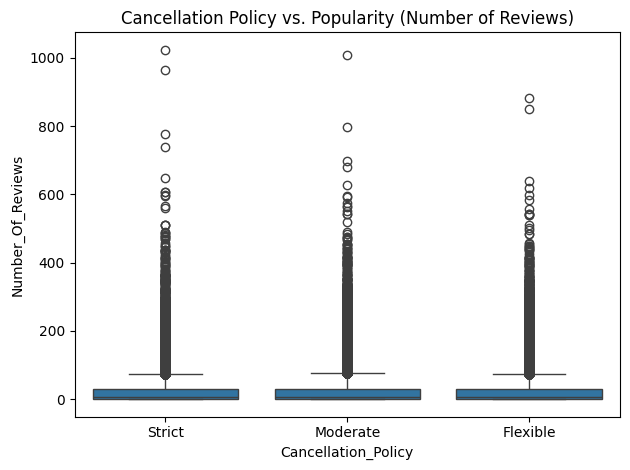

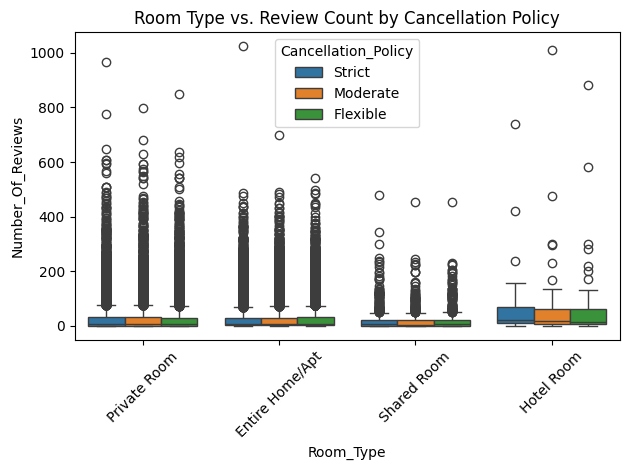

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Airbnb_Open_Data_Cleaned.csv')
df.columns

# Top 10 Most Expensive Neighbourhood

df_price = df.groupby('Neighbourhood', as_index=False)['Price'].mean()
top10 = df_price.sort_values(by='Price', ascending=False).head(10)
sns.barplot(data = df.head(10), x='Neighbourhood', y='Price')
plt.title("Top 10 Most Expensive Neighbourhoods (Average Price)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Top 10 most Affordable Neighbourhood

df_price = df.groupby('Neighbourhood', as_index=False)['Price'].mean()
top10_affordable = df_price.sort_values(by='Price', ascending=True).head(10)
sns.barplot(data=top10_affordable, x='Neighbourhood', y='Price')
plt.title("Top 10 Most Affordable Neighbourhoods (Average Price)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Price distribution as per Neighbourhood group

sns.boxplot(data=df, x='Neighbourhood_Group', y='Price')
plt.title("Price Distribution by Neighbourhood Group")
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

# Price vs. room type

sns.barplot(data=df, x='Room_Type', y='Price', estimator='mean', errorbar=None)
plt.title("Average Price by Room Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Cancellation v/s price

sns.boxplot(data=df, x='Cancellation_Policy', y='Price')
plt.title("Price Distribution by Cancellation Policy")
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

#Instant Bookable v/s Price

sns.boxplot(data=df, x='Instant_Bookable', y='Price')
plt.title("Price Distribution by Instant Bookable Status")
plt.xticks(rotation=0)
plt.yscale('log')
plt.tight_layout()
plt.show()

#Verified vs. Non-Verified Hosts: Check if verified hosts charge more or get more reviews.

# 1. Average price
sns.barplot(data=df, x='Host_Id_Verified', y='Price', estimator='mean', errorbar=None)
plt.title("Average Price: Verified vs Non-Verified Hosts")
plt.tight_layout()
plt.show()

# 2. Average number of reviews
sns.barplot(data=df, x='Host_Id_Verified', y='Number_Of_Reviews', estimator='mean', errorbar=None)
plt.title("Average Number of Reviews: Verified vs Non-Verified Hosts")
plt.tight_layout()
plt.show()

# 3. Price distribution
sns.boxplot(data=df, x='Host_Id_Verified', y='Price')
plt.yscale('log')  # Optional for better visibility
plt.title("Price Distribution by Host Verification Status")
plt.tight_layout()
plt.show()

# 4. Reviews distribution
sns.boxplot(data=df, x='Host_Id_Verified', y='Number_Of_Reviews')
plt.title("Review Count Distribution by Host Verification Status")
plt.tight_layout()
plt.show()

# Availability over a year:Indeintify propreties which are availble for larger part of the year.

print(df.columns.tolist())
high_availability = df[df['Instant_Bookable'] >= 300]
print(f"Number of properties available ≥300 days/year: {len(high_availability)}")
sns.histplot(df['Instant_Bookable'], bins=30, kde=True)
plt.title("Distribution of Property Availability Over the Year")
plt.xlabel("Number of Days Available (per year)")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()

df_avail=df['Instant_Bookable'].value_counts().sort_values(ascending=False).reset_index()
df_avail.head(10)
df_instant=df['Instant_Bookable'].value_counts().sort_values(ascending=False).reset_index()
df_instant
plt.pie(df_instant['count'],labels=df_instant['Instant_Bookable'],autopct='%1.2f%%')
plt.title("Instant v/s Non-instant")
plt.show()

# Review count distribution

sns.histplot(data=df, x='Number_Of_Reviews', bins=50, kde=True)
plt.title("Distribution of Review Counts")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()

sns.boxplot(data=df, y='Number_Of_Reviews')
plt.title("Review Count Boxplot")
plt.tight_layout()
plt.show()

df_reviews=sns.boxplot(x=df['Room_Type'],y=df['Number_Of_Reviews'])
df_rev_score=df.groupby(by='Room_Type')['Number_Of_Reviews'].mean().sort_values(ascending=False).reset_index()
df_rev_score
sns.boxplot(x=df['Room_Type'],y=df['Number_Of_Reviews'])
plt.show()

# Cancellation Policy vs. Popularity

sns.boxplot(x=df['Cancellation_Policy'], y=df['Number_Of_Reviews'])
plt.title("Cancellation Policy vs. Popularity (Number of Reviews)")
plt.tight_layout()
plt.show()

sns.boxplot(data=df, x='Room_Type', y='Number_Of_Reviews', hue='Cancellation_Policy')
plt.title("Room Type vs. Review Count by Cancellation Policy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()